## HEART DISEASE PREDICTION

#  Dataset Description

In [1]:

#This dataset consists of 11 features and a target variable. It has 6 nominal variables and 5 numeric variables. The detailed description of all the features are as follows:

#1. Age: Patients Age in years (Numeric)
#2. Sex: Gender of patient (Male - 1, Female - 0) (Nominal)
#3. Chest Pain Type: Type of chest pain experienced by patient categorized into 1 typical, 2 atypical angina, 3 non- anginal pain, 4 asymptomatic (Nominal)
#4. resting bp s: Level of blood pressure at resting mode in mm/HG (Numerical)
#5. cholesterol: Serum cholesterol in mg/dl (Numeric)
#6. fasting blood sugar: Blood sugar levels on fasting > 120 mg/dl represents as 1 in case of true and 0 as false (Nominal)
#7. resting ecg: Result of electrocardiogram while at rest are represented in 3 
#distinct values 0 : Normal 1: Abnormality in ST-T wave 2: Left ventricular hypertrophy (Nominal)
#8. max heart rate: Maximum heart rate achieved (Numeric)
#9. exercise angina: Angina induced by exercise 0 depicting NO 1 depicting Yes (Nominal)
#10. oldpeak: Exercise induced ST-depression in comparison with the state of rest (Numeric)
#11. ST slope: ST segment measured in terms of slope during peak exercise 0: Normal 1: Upsloping 2: Flat 3: Downsloping (Nominal)

#   Importing Libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')

# data wrangling & pre-processing
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

#model validation
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
from sklearn import metrics

# cross validation
#from sklearn.model_selection import StratifiedKFold

# machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from scipy import stats

# Loading dataset

In [3]:
dt = pd.read_csv(r"C:\Users\sahup\Downloads\heart_disease.csv")

In [4]:
# seeing some of the sample entries of dataset

In [5]:
dt.head(5)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [6]:
#As we can see from above dataset entries some of the features should be nominal and to be encoded as their category type. In the next step we will be encoding features to their respective category as per the dataset description.

# Data Cleaning & Preprocessing

In [7]:
#In this step we will first change the name of columns as some of the columns have weird naming pattern and then we will encode the features into categorical variables

In [8]:
# renaming features to proper name
dt.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope','target']

In [9]:
dt.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [10]:
# converting numerical features to categorical features 

dt['chest_pain_type'][dt['chest_pain_type'] == 1] = 'typical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 2] = 'atypical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 3] = 'non-anginal pain'
dt['chest_pain_type'][dt['chest_pain_type'] == 4] = 'asymptomatic'



dt['rest_ecg'][dt['rest_ecg'] == 0] = 'normal'
dt['rest_ecg'][dt['rest_ecg'] == 1] = 'ST-T wave abnormality'
dt['rest_ecg'][dt['rest_ecg'] == 2] = 'left ventricular hypertrophy'



dt['st_slope'][dt['st_slope'] == 1] = 'upsloping'
dt['st_slope'][dt['st_slope'] == 2] = 'flat'
dt['st_slope'][dt['st_slope'] == 3] = 'downsloping'

dt["sex"] = dt.sex.apply(lambda  x:'male' if x==1 else 'female')

In [11]:
dt.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,target
0,40,male,atypical angina,140,289,0,normal,172,0,0.0,upsloping,0
1,49,female,non-anginal pain,160,180,0,normal,156,0,1.0,flat,1
2,37,male,atypical angina,130,283,0,ST-T wave abnormality,98,0,0.0,upsloping,0
3,48,female,asymptomatic,138,214,0,normal,108,1,1.5,flat,1
4,54,male,non-anginal pain,150,195,0,normal,122,0,0.0,upsloping,0


In [12]:
dt['chest_pain_type'].value_counts()

chest_pain_type
asymptomatic        625
non-anginal pain    283
atypical angina     216
typical angina       66
Name: count, dtype: int64

In [13]:
dt['rest_ecg'].value_counts()

rest_ecg
normal                          684
left ventricular hypertrophy    325
ST-T wave abnormality           181
Name: count, dtype: int64

In [14]:
dt['st_slope'].value_counts()

st_slope
flat           582
upsloping      526
downsloping     81
0                1
Name: count, dtype: int64

In [15]:
#dropping row with st_slope =0
dt.drop(dt[dt.st_slope ==0].index, inplace=True)
#checking distribution
dt['st_slope'].value_counts()

st_slope
flat           582
upsloping      526
downsloping     81
Name: count, dtype: int64

As we can see features are encoded sucessfully to their respective categories. Next we will be checking if there is any missing entry or not ?

In [16]:
dt.isna().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
target                     0
dtype: int64

In [17]:
#So, there are no missing entries in the dataset thats great. Next we will move towards exploring the dataset by performing detailed EDA

### Exploratory Data Analysis (EDA)

In [18]:
# first checking the shape of the dataset
dt.shape

(1189, 12)




So, there are total 1189 records and 11 features with 1 target variable. Lets check the summary of numerical and categorical features.

In [27]:
# summary statistics of numerical columns
dt.describe(include =[np.number])

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,target
count,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000
mean,53.708158,132.138772,210.376787,0.212784,139.739277,0.387721,0.923549,0.528175
std,9.352961,18.369251,101.462185,0.409448,25.527386,0.487435,1.086464,0.499416
min,28.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,47.000000,120.000000,188.000000,0.000000,121.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,229.000000,0.000000,141.000000,0.000000,0.600000,1.000000
75%,60.000000,140.000000,270.000000,0.000000,160.000000,1.000000,1.600000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,1.000000


As we can see from above description resting_blood_pressure and cholestrol have some outliers as they have minimum value of 0 whereas cholestrol has outlier on upper side also having maximum value of 603.

In [19]:
# summary statistics of categorical columns
summary_statistics = dt.describe(include=['object', 'category'])
print(summary_statistics)

         sex chest_pain_type rest_ecg st_slope
count   1189            1189     1189     1189
unique     2               4        3        3
top     male    asymptomatic   normal     flat
freq     908             625      683      582


# Distribution of Heart disease (target variable)

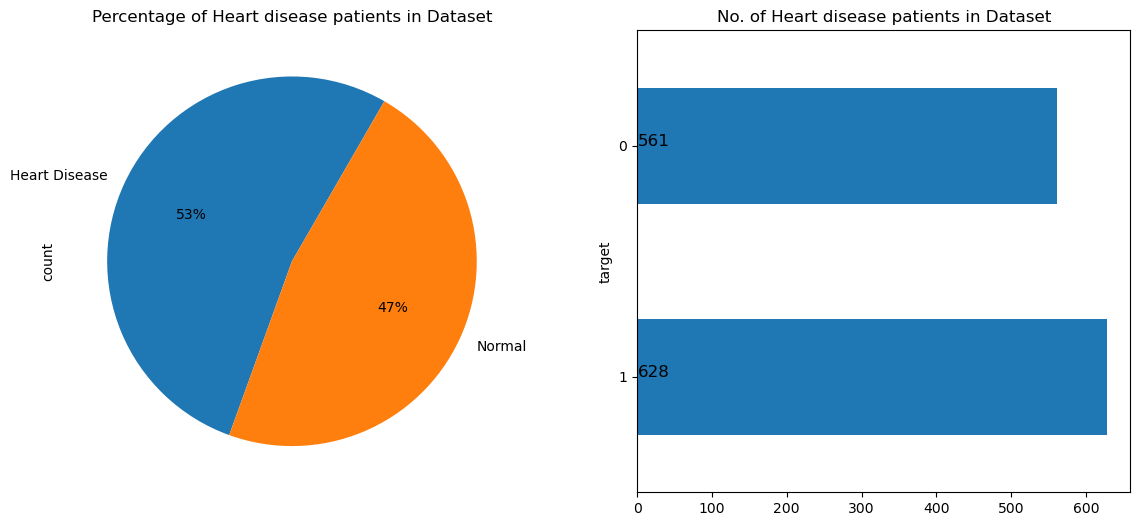

In [20]:
# Plotting attrition of employees
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14,6))

ax1 = dt['target'].value_counts().plot.pie( x="Heart disease" ,y ='no.of patients', 
                   autopct = "%1.0f%%",labels=["Heart Disease","Normal"], startangle = 60,ax=ax1);
ax1.set(title = 'Percentage of Heart disease patients in Dataset')

ax2 = dt["target"].value_counts().plot(kind="barh" ,ax =ax2)
for i,j in enumerate(dt["target"].value_counts().values):
    ax2.text(.5,i,j,fontsize=12)
ax2.set(title = 'No. of Heart disease patients in Dataset')
plt.show()

The dataset is balanced having 629 heart disease patients and 561 normal patients

# Checking Gender & Agewise Distribution

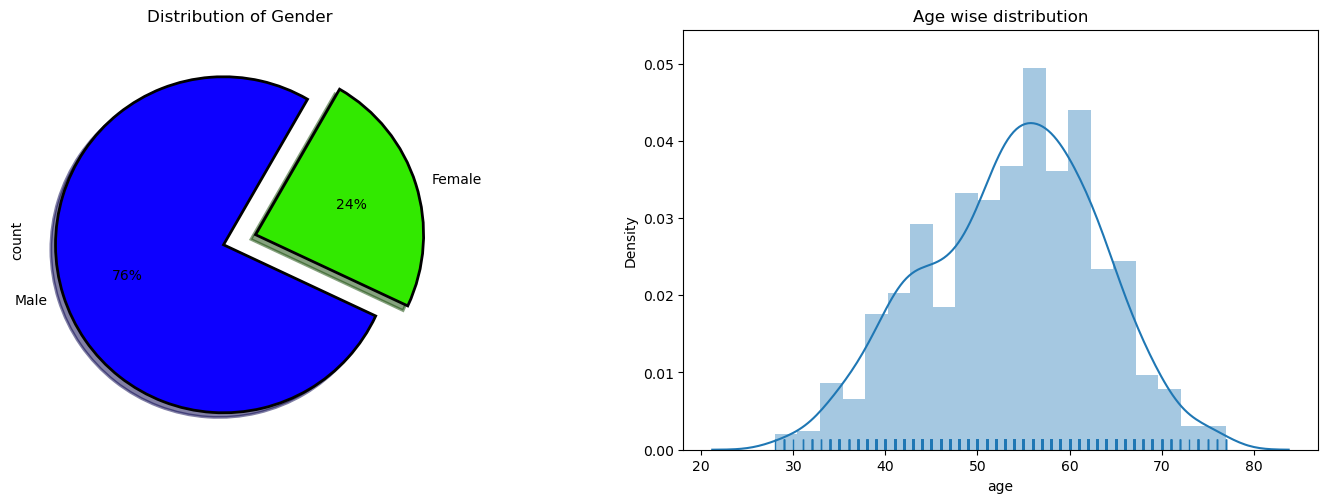

In [21]:
plt.figure(figsize=(18,12))
plt.subplot(221)
dt["sex"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",5),startangle = 60,labels=["Male","Female"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,.1],shadow =True)
plt.title("Distribution of Gender")
plt.subplot(222)
ax= sns.distplot(dt['age'], rug=True)
plt.title("Age wise distribution")
plt.show()

As we can see from above plot, in this dataset males percentage is  too higher than females where as average age of patients is around 55.

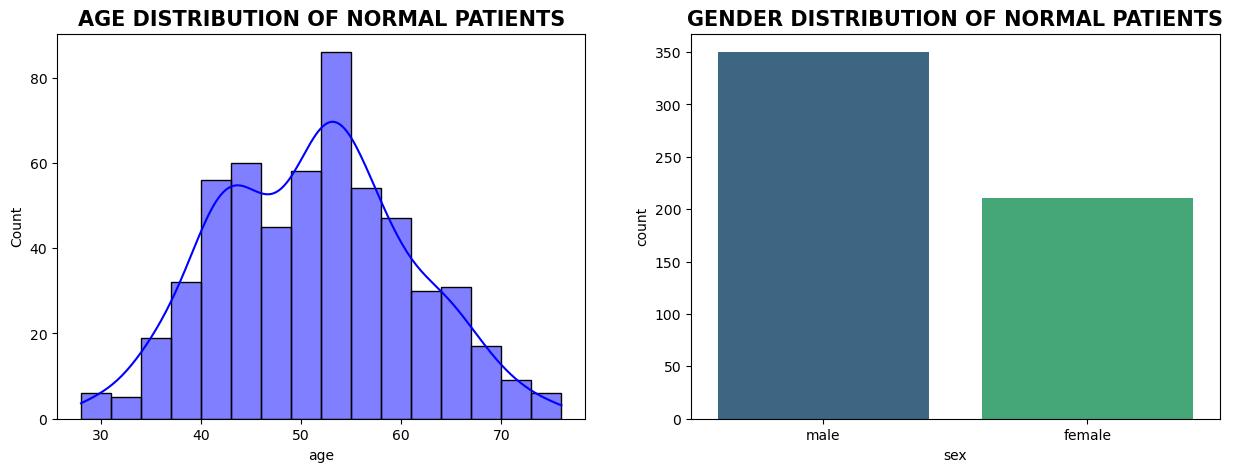

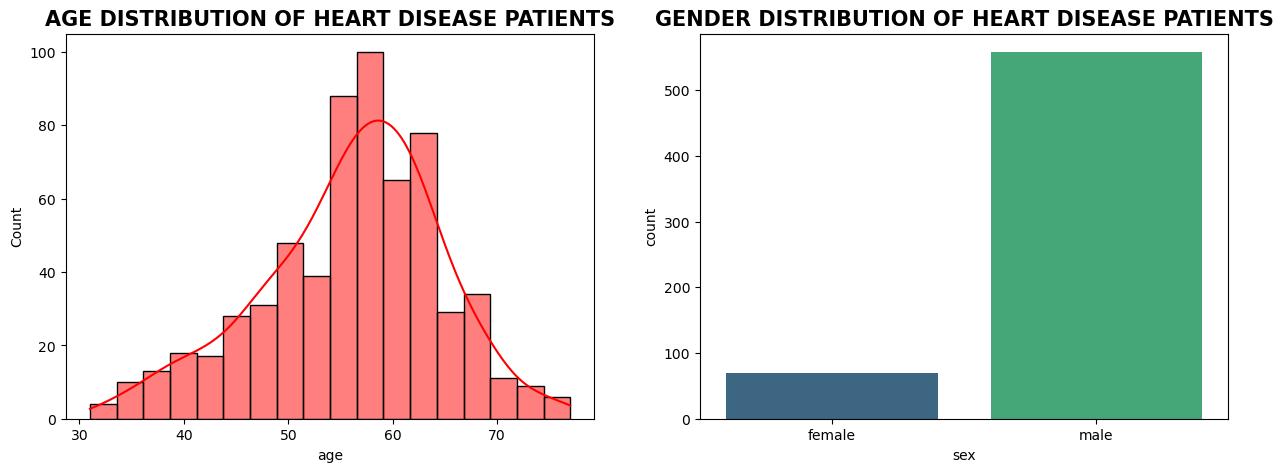

In [22]:

import matplotlib.pyplot as plt
import seaborn as sns

# Creating separate DataFrames for normal and heart disease patients
attr_1 = dt[dt['target'] == 1]  # Heart disease patients
attr_0 = dt[dt['target'] == 0]  # Normal patients

# Plotting for normal patients
fig = plt.figure(figsize=(15, 5))

# Age distribution of normal patients
ax1 = plt.subplot2grid((1, 2), (0, 0))
sns.histplot(attr_0['age'], kde=True, color='blue')
plt.title('AGE DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold')

# Gender distribution of normal patients
ax2 = plt.subplot2grid((1, 2), (0, 1))
sns.countplot(x='sex', data=attr_0, palette='viridis')
plt.title('GENDER DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold')
plt.show()

# Plotting for heart disease patients
fig = plt.figure(figsize=(15, 5))

# Age distribution of heart disease patients
ax1 = plt.subplot2grid((1, 2), (0, 0))
sns.histplot(attr_1['age'], kde=True, color='red')
plt.title('AGE DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold')

# Gender distribution of heart disease patients
ax2 = plt.subplot2grid((1, 2), (0, 1))
sns.countplot(x='sex', data=attr_1, palette='viridis')
plt.title('GENDER DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold')
plt.show()



As we can see from above plot more patients accounts for heart disease in comparison to females whereas mean age for heart disease patients is around 58 to 60 years

# Distribution of Chest Pain Type

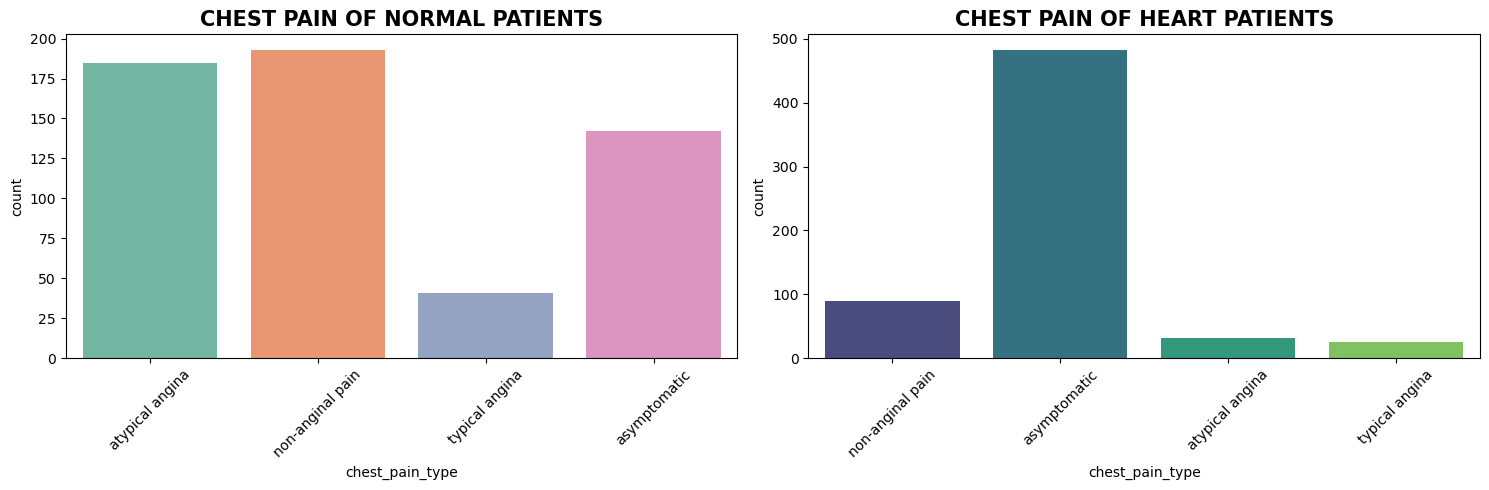

In [23]:


# Plotting for normal patients
fig = plt.figure(figsize=(15, 5))

# Chest pain distribution of normal patients
ax1 = plt.subplot2grid((1, 2), (0, 0))
sns.countplot(x='chest_pain_type', data=attr_0, palette='Set2')
plt.title('CHEST PAIN OF NORMAL PATIENTS', fontsize=15, weight='bold')
plt.xticks(rotation=45)  # Rotate labels for better readability

# Chest pain distribution of heart disease patients
ax2 = plt.subplot2grid((1, 2), (0, 1))
sns.countplot(x='chest_pain_type', data=attr_1, palette='viridis')
plt.title('CHEST PAIN OF HEART PATIENTS', fontsize=15, weight='bold')
plt.xticks(rotation=45)  # Rotate labels for better readability

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [24]:
#Exploring the Heart Disease patients based on Chest Pain Type
plot_criteria= ['chest_pain_type', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(dt[plot_criteria[0]], dt[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
chest_pain_type,,
asymptomatic,25.310000,76.910000
atypical angina,32.980000,4.940000
non-anginal pain,34.400000,14.170000
typical angina,7.310000,3.980000


As we can see from above plot 76% of the chest pain type of the heart disease patients have asymptomatic chest pain.

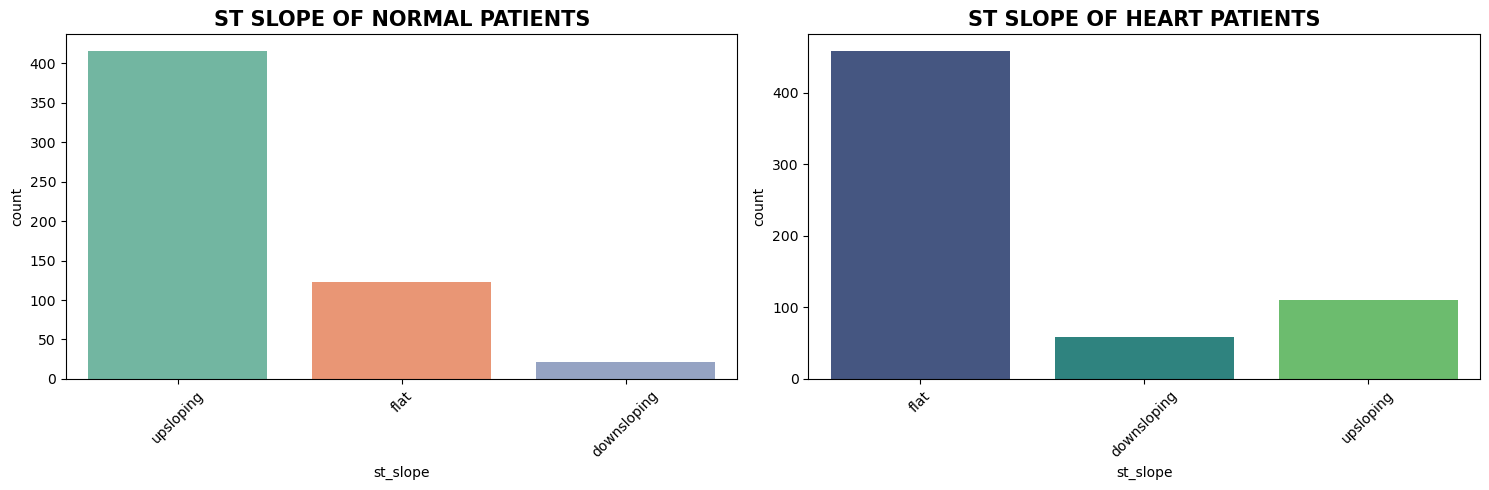

In [25]:

# Plotting for normal patients
fig = plt.figure(figsize=(15, 5))

# Rest ECG distribution of normal patients
ax1 = plt.subplot2grid((1, 2), (0, 0))
sns.countplot(x='st_slope', data=attr_0, palette='Set2')
plt.title('ST SLOPE OF NORMAL PATIENTS', fontsize=15, weight='bold')
plt.xticks(rotation=45)  # Rotate labels for better readability

# Rest ECG distribution of heart disease patients
ax2 = plt.subplot2grid((1, 2), (0, 1))
sns.countplot(x='st_slope', data=attr_1, palette='viridis')
plt.title('ST SLOPE OF HEART PATIENTS', fontsize=15, weight='bold')
plt.xticks(rotation=45)  # Rotate labels for better readability

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


# Distribution of Numerical features

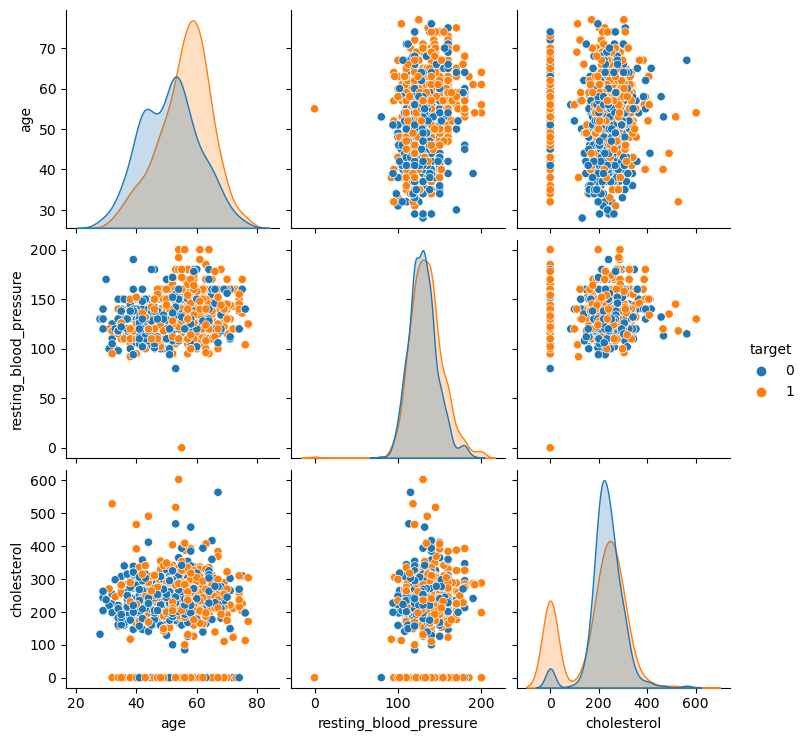

In [26]:
sns.pairplot(dt, hue = 'target', vars = ['age', 'resting_blood_pressure', 'cholesterol'] )

From the above plot it is clear that as the age increases chances of heart disease increases

<Axes: xlabel='resting_blood_pressure', ylabel='cholesterol'>

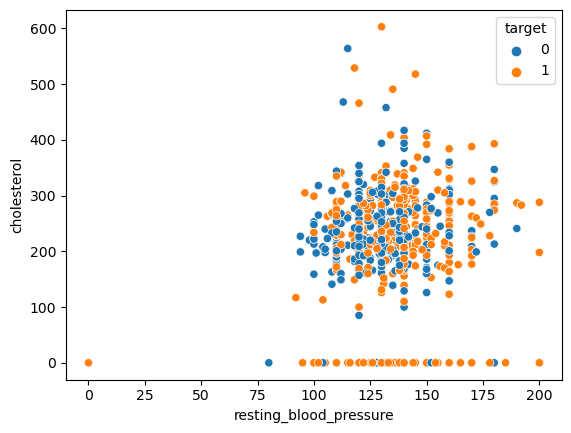

In [27]:
sns.scatterplot(x = 'resting_blood_pressure', y = 'cholesterol', hue = 'target', data = dt)

From the above plot we can see outliers clearly as for some of the patients cholestrol is 0 whereas for one patient both cholestrol and resting bp is 0 which is may be due to missing entries we will filter these ouliers later

<Axes: xlabel='resting_blood_pressure', ylabel='age'>

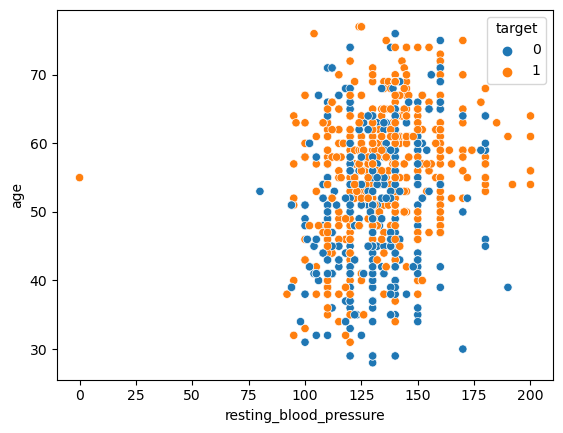

In [28]:
sns.scatterplot(x = 'resting_blood_pressure', y = 'age', hue = 'target', data = dt)

# Outlier Detection & Removal

Detecting outlier using z-score

In [29]:
# filtering numeric features as age , resting bp, cholestrol and max heart rate achieved has outliers as per EDA

dt_numeric = dt[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved']]
dt_numeric.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved
0,40,140,289,172
1,49,160,180,156
2,37,130,283,98
3,48,138,214,108
4,54,150,195,122


In [30]:
# calculating zscore of numeric columns in the dataset
z = np.abs(stats.zscore(dt_numeric))
print(z)

           age  resting_blood_pressure  cholesterol  max_heart_rate_achieved
0     1.466266                0.428136     0.775228                 1.264301
1     0.503599                1.517370     0.299516                 0.637259
2     1.787155                0.116481     0.716067                 1.635766
3     0.610562                0.319212     0.035725                 1.243865
4     0.031216                0.972753     0.151616                 0.695204
...        ...                     ...          ...                      ...
1185  0.931451                1.205715     0.528727                 0.303303
1186  1.528698                0.645983     0.171336                 0.049408
1187  0.352105                0.116481     0.782658                 0.969535
1188  0.352105                0.116481     0.252646                 1.342681
1189  1.680192                0.319212     0.348816                 1.303491

[1189 rows x 4 columns]


from these points it is diffciult to say which points are outliers so we will now define threshold

In [31]:
# Defining threshold for filtering outliers 
threshold = 3
print(np.where(z > 3))

(array([  30,   76,  109,  149,  242,  366,  371,  391,  400,  450,  592,
        617,  733,  760, 1012, 1038, 1074], dtype=int64), array([2, 2, 1, 2, 1, 1, 3, 3, 1, 1, 1, 2, 1, 1, 1, 2, 1], dtype=int64))


The first array contains the list of row numbers and second array respective column numbers, which mean z[30][2] have a Z-score higher than 3. There are total 17 data points which are outliers.

In [32]:
#filtering outliers retaining only those data points which are below threshhold
dt = dt[(z < 3).all(axis=1)]


In [33]:
# checking shape of dataset after outlier removal
dt.shape

(1172, 12)

Great !! all the 17 data points which are outliers are now removed.

Now before splitting dataset into train and test we first encode categorical variables as dummy variables and segregate feature and target variable.

In [34]:
## encoding categorical variables
dt = pd.get_dummies(dt, drop_first=True)

dt.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_upsloping
0,40,140,289,0,172,0,0.0,0,True,True,False,False,False,True,False,True
1,49,160,180,0,156,0,1.0,1,False,False,True,False,False,True,True,False
2,37,130,283,0,98,0,0.0,0,True,True,False,False,False,False,False,True
3,48,138,214,0,108,1,1.5,1,False,False,False,False,False,True,True,False
4,54,150,195,0,122,0,0.0,0,True,False,True,False,False,True,False,True


In [35]:
# Convert boolean columns to integers (1 and 0)
boolean_columns = dt.select_dtypes(include=['bool']).columns
dt[boolean_columns] = dt[boolean_columns].astype(int)

# Now encode the remaining categorical variables
dt = pd.get_dummies(dt, drop_first=True)

# Display the first few rows
dt.head()


,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_upsloping
0,40,140,289,0,172,0,0.0,0,1,1,0,0,0,1,0,1
1,49,160,180,0,156,0,1.0,1,0,0,1,0,0,1,1,0
2,37,130,283,0,98,0,0.0,0,1,1,0,0,0,0,0,1
3,48,138,214,0,108,1,1.5,1,0,0,0,0,0,1,1,0
4,54,150,195,0,122,0,0.0,0,1,0,1,0,0,1,0,1


In [36]:
# segregating dataset into features i.e., X and target variables i.e., y
X = dt.drop(['target'],axis=1)
Y = dt['target']

# Checking Correlation

<Axes: title={'center': 'Correlation with Target'}>

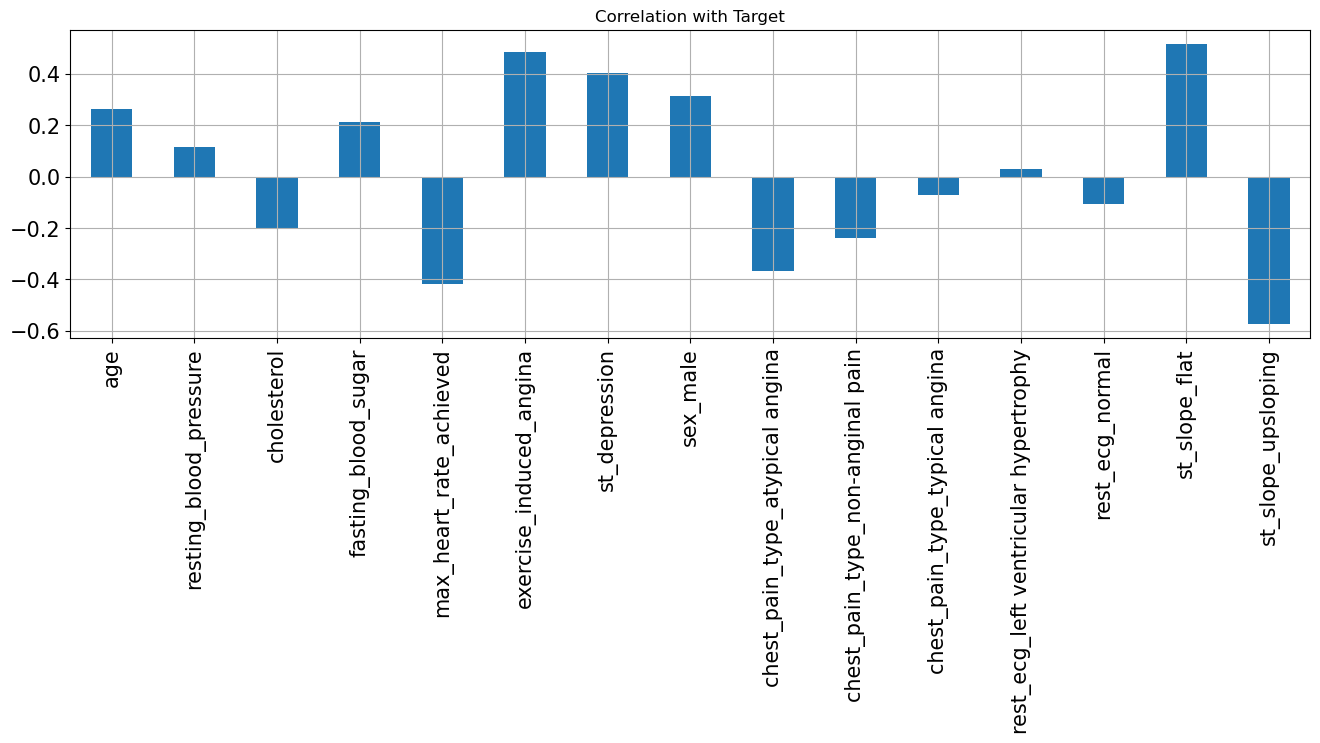

In [37]:
#Correlation with Response Variable class

X.corrwith(Y).plot.bar(
        figsize = (16, 4), title = "Correlation with Target", fontsize = 15,
        rot = 90, grid = True)

# Train Test Split

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.2,shuffle=True, random_state=5)

In [39]:
## checking distribution of traget variable in train test split
print('Distribution of traget variable in training set')
print(Y_train.value_counts())

print('Distribution of traget variable in test set')
print(Y_test.value_counts())

Distribution of traget variable in training set
target
1    491
0    446
Name: count, dtype: int64
Distribution of traget variable in test set
target
1    123
0    112
Name: count, dtype: int64


In [40]:
print('------------Training Set------------------')
print(X_train.shape)
print(Y_train.shape)

print('------------Test Set------------------')
print(X_test.shape)
print(Y_test.shape)

------------Training Set------------------
(937, 15)
(937,)
------------Test Set------------------
(235, 15)
(235,)


# Model Fitting

In [41]:
from sklearn.metrics import accuracy_score

### Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

### Random Forest Classifier (criterion = 'entropy')

In [43]:
rf = RandomForestClassifier(criterion='entropy',n_estimators=100)
rf.fit(X_train, Y_train)
Y_pred_rf = rf.predict(X_test)

# Checking Accuracy

In [44]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

The accuracy score achieved using Logistic Regression is: 82.55 %
The accuracy score achieved using Random Forest is: 90.21 %


##### Random forest has good result as compare to Logistic Regression 

In [46]:
input_data = (64,1,3,170,227,0,0,155,0, 0.6,1,0,3)

# Convert the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Add the missing features (e.g., two zeros)
input_data_padded = np.append(input_data_as_numpy_array, [0, 0])

# Reshape the data as required by the model (1 sample with 15 features)
input_data_reshaped = input_data_padded.reshape(1, -1)

# Make prediction using the random forest classifier (assuming rf is already trained)
prediction = rf.predict(input_data_reshaped)

# Output the result based on the prediction
if prediction[0] == 0:
    print('The person does not have a heart disease')
else:
    print('The person has heart disease')

The person has heart disease
